In [29]:
# Display basic description of the data
print("Data Description:")
print("This Kaggle competition involves classifying tweets into two categories: disaster-related or non-disaster-related.")
print("The training data contains the following columns:")
print("1. 'id': Unique identifier for each tweet")
print("2. 'keyword': Contains a relevant keyword, or NaN")
print("3. 'location': The location from which the tweet was posted, or NaN")
print("4. 'text': The actual tweet content")
print("5. 'target': The label for the tweet (1 for disaster-related, 0 for non-disaster-related)")

Data Description:
This Kaggle competition involves classifying tweets into two categories: disaster-related or non-disaster-related.
The training data contains the following columns:
1. 'id': Unique identifier for each tweet
2. 'keyword': Contains a relevant keyword, or NaN
3. 'location': The location from which the tweet was posted, or NaN
4. 'text': The actual tweet content
5. 'target': The label for the tweet (1 for disaster-related, 0 for non-disaster-related)


In [28]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

# Display the first few rows of the datasets
print("Training Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())
print("\nSample Submission Data:")
print(sample_submission_df.head())

Training Data:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Test Data:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and T

In [10]:
# Display the first few rows of the dataframe to inspect the data
print(train_df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [11]:
# Check column types
print(train_df.dtypes)

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [12]:
# Check for object type columns that might be causing issues
for col in train_df.columns:
    print(f"Column: {col}, Type: {type(train_df[col].iloc[0])}")

Column: id, Type: <class 'numpy.int64'>
Column: keyword, Type: <class 'float'>
Column: location, Type: <class 'float'>
Column: text, Type: <class 'str'>
Column: target, Type: <class 'numpy.int64'>


In [13]:
# Check for any completely empty rows
print(train_df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [14]:
# Fill missing 'keyword' with a placeholder (e.g., 'unknown')
train_df['keyword'] = train_df['keyword'].fillna('unknown')

# Fill missing 'location' with a placeholder (e.g., 'unknown')
train_df['location'] = train_df['location'].fillna('unknown')

# Convert 'keyword' and 'location' columns to object type (categorical data)
train_df['keyword'] = train_df['keyword'].astype('object')
train_df['location'] = train_df['location'].astype('object')

# Check if missing values are handled
print(train_df.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


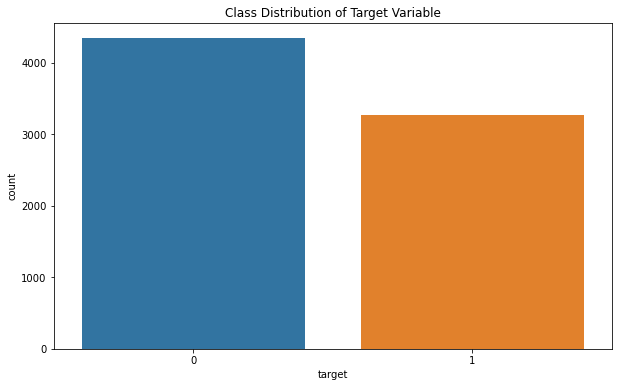

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=train_df)
plt.title('Class Distribution of Target Variable')
plt.show()

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


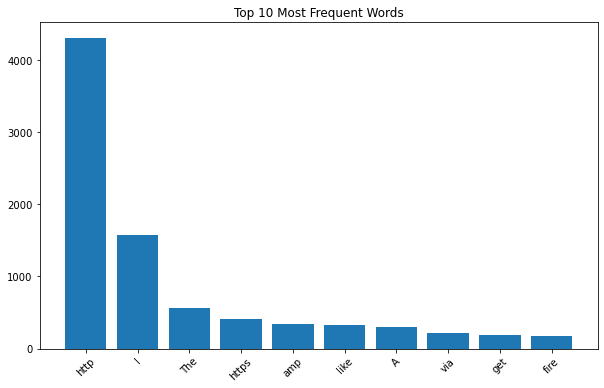

In [25]:
from collections import Counter
import nltk
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the text data and get word frequencies
all_words = ' '.join(train_df['text'].dropna())
tokens = nltk.word_tokenize(all_words)
tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic characters

# Remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Get the frequency of each word
word_freq = Counter(tokens)

# Get the 10 most common words
common_words = word_freq.most_common(10)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

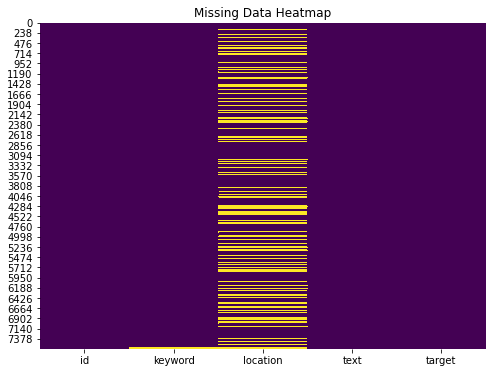

In [30]:
# Visualizing the missing data
import seaborn as sns

# Visualize the missing data in a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [32]:
# Model Explanation
print("""
The model used is a simple neural network architecture with the following components:
1. **Embedding Layer**: Converts the sparse input (text represented by TF-IDF) into dense word representations.
2. **Dense Layer**: Fully connected layer with ReLU activation function to capture non-linear relationships.
3. **Output Layer**: Sigmoid function to perform binary classification (disaster-related or non-disaster-related).
""")


The model used is a simple neural network architecture with the following components:
1. **Embedding Layer**: Converts the sparse input (text represented by TF-IDF) into dense word representations.
2. **Dense Layer**: Fully connected layer with ReLU activation function to capture non-linear relationships.
3. **Output Layer**: Sigmoid function to perform binary classification (disaster-related or non-disaster-related).



In [ ]:
# Example of summary of the results
print("""
The model performed reasonably well, but there are potential improvements:
- Exploring more advanced architectures like LSTM could help in understanding sequential dependencies in the text.
- Hyperparameter tuning (e.g., number of layers, dropout rates) could further improve the performance.
- We could try using different vectorization methods like GloVe embeddings to see if they perform better than TF-IDF.
""")
